# **🍽️ Restaurant Tips Analysis**

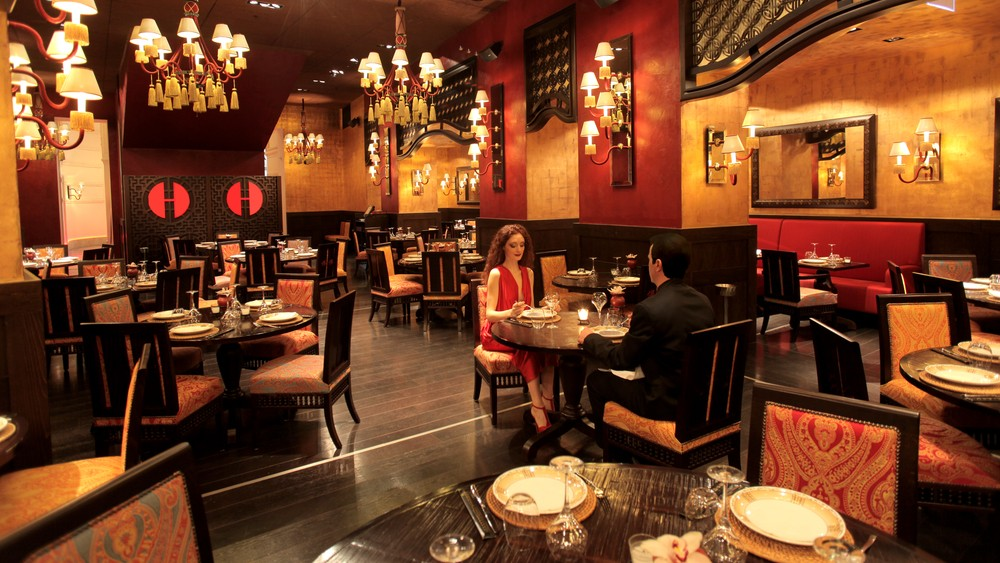

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [ ]:
# Import data
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [ ]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [ ]:
# Show first 5 rows
df.head(5)

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [ ]:
# Check columns types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

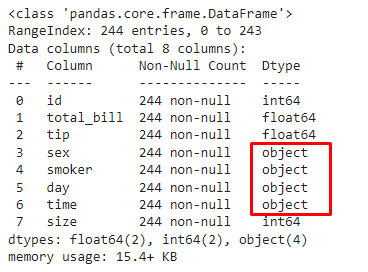

Let's fix their types and make them string:

In [ ]:
# Convert types
df1 = df.convert_dtypes()

Check again (output columns and their types):

In [ ]:
# Check columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [ ]:
# Show descriptive statistics
df1.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [ ]:
# Create "smokers_df" dataframe
smokers_df = df1[df1['smoker'] == 'Yes']

#smokers_df = df1.query('smoker == "Yes"') - Alternative solution

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# Test sample
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
207,207,38.73,3.0,Male,Yes,Sat,Dinner,4
80,80,19.44,3.0,Male,Yes,Thur,Lunch,2
206,206,26.59,3.41,Male,Yes,Sat,Dinner,3
208,208,24.27,2.03,Male,Yes,Sat,Dinner,2
199,199,13.51,2.0,Male,Yes,Thur,Lunch,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [ ]:
# Create "non_smokers_df" dataframe
non_smokers_df = df1.query('smoker == "No"')

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# Test sample
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
154,154,19.77,2.0,Male,No,Sun,Dinner,4
64,64,17.59,2.64,Male,No,Sat,Dinner,3
232,232,11.61,3.39,Male,No,Sat,Dinner,2
16,16,10.33,1.67,Female,No,Sun,Dinner,3
28,28,21.7,4.3,Male,No,Sat,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
# Calculation
common_tip_min = df1['tip'].min()
common_tip_max = df1['tip'].max()
common_tip_mean = df1['tip'].mean()
common_tip_median = df1['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
# Calculation for smokers
smokers_tip_min = smokers_df['tip'].min()
smokers_tip_max = smokers_df['tip'].max()
smokers_tip_mean = smokers_df['tip'].mean()
smokers_tip_median = smokers_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
# Calculation for non-smokers
non_smokers_tip_min = non_smokers_df['tip'].min()
non_smokers_tip_max = non_smokers_df['tip'].max()
non_smokers_tip_mean = non_smokers_df['tip'].mean()
non_smokers_tip_median = non_smokers_df['tip'].median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Smokers give the highest tip, which was \$10

2. On average (both mean and median), non-smokers tip less than smokers.

General conclusion:
Smokers tend to be more generous with their tips compared to non-smokers.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

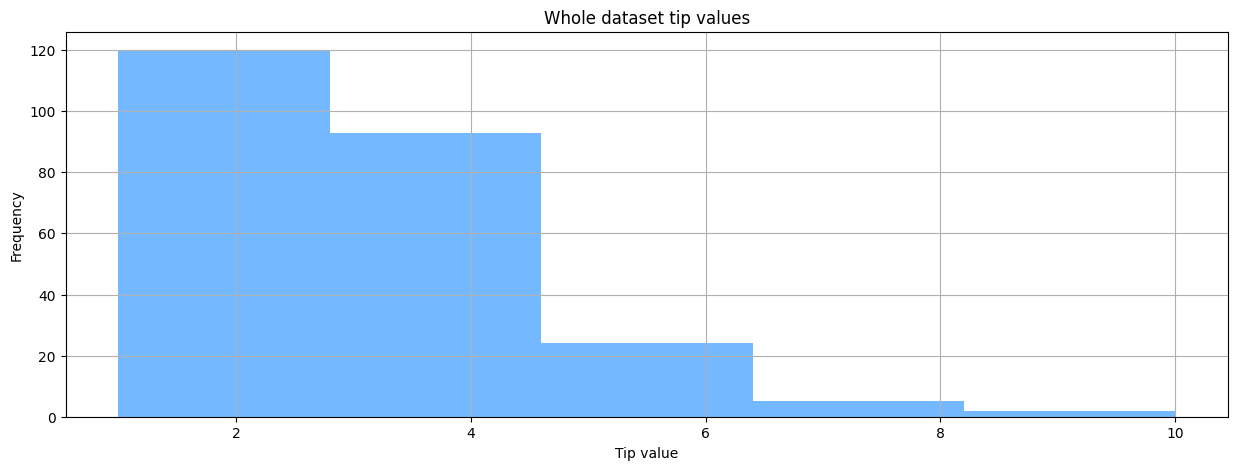

In [ ]:
# Create histogram
plt.figure(figsize = (15, 5))

plt.hist(df1.tip,
         bins = 5,
         color = '#74b9ff')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')

plt.grid(True)

plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

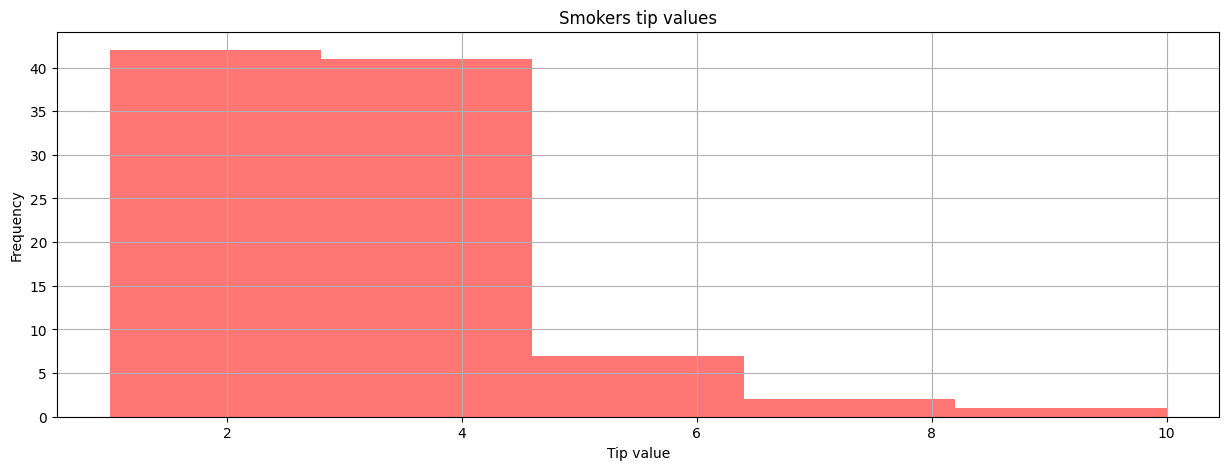

In [ ]:
# Create smokers histogram
plt.figure(figsize = (15, 5))

plt.hist(smokers_df.tip,
         bins = 5,
         color = '#ff7675')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')

plt.grid(True)

plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

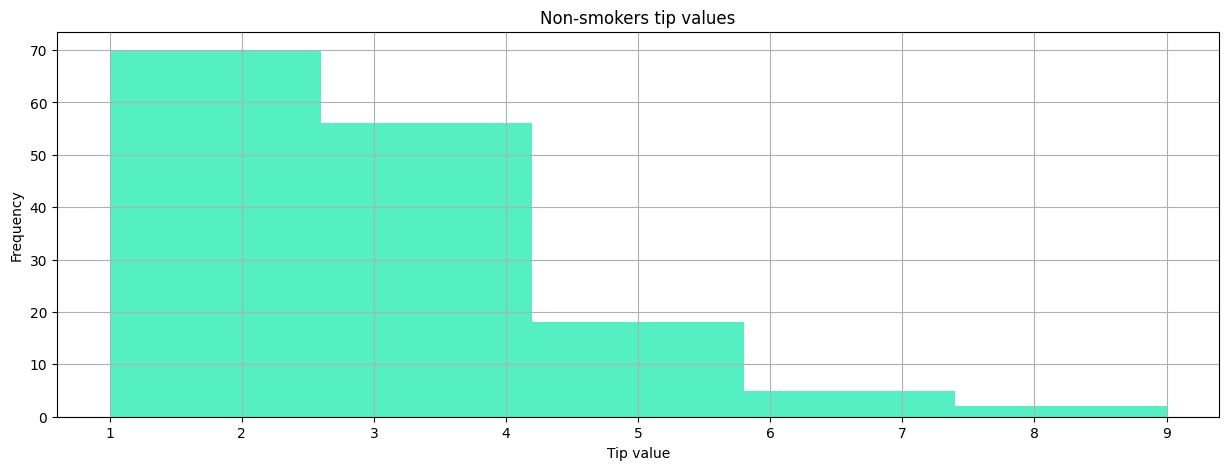

In [ ]:
# Create non_smokers histogram
plt.figure(figsize = (15, 5))

plt.hist(non_smokers_df.tip,
         bins = 5,
         color = '#55efc4')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')

plt.grid(True)

plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

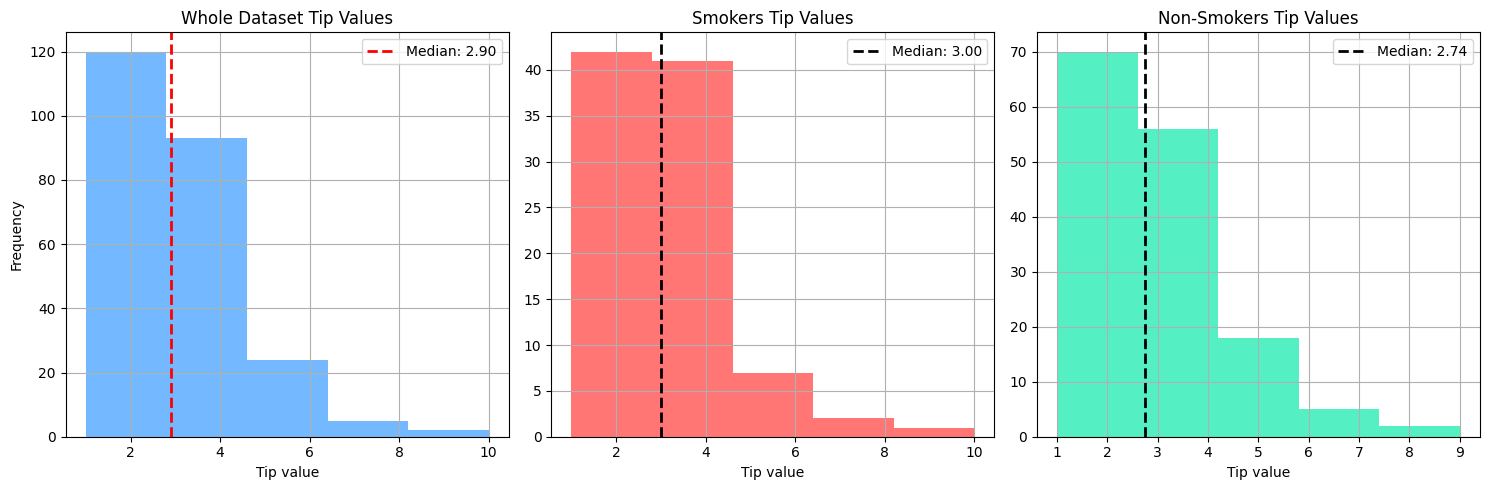

In [ ]:
# Create a figure with 3 subplots in 1 row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for whole dataset
axes[0].hist(df1.tip, bins=5, color='#74b9ff')
axes[0].set_title('Whole Dataset Tip Values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df1.tip.median(), color='red', linestyle='dashed', linewidth=2, label=f'Median: {df1.tip.median():.2f}')
axes[0].legend()
axes[0].grid(True)

# Histogram for smokers
axes[1].hist(smokers_df.tip, bins=5, color='#ff7675')
axes[1].set_title('Smokers Tip Values')
axes[1].set_xlabel('Tip value')
axes[1].axvline(smokers_df.tip.median(), color='black', linestyle='dashed', linewidth=2, label=f'Median: {smokers_df.tip.median():.2f}')
axes[1].legend()
axes[1].grid(True)

# Histogram for non-smokers
axes[2].hist(non_smokers_df.tip, bins=5, color='#55efc4')
axes[2].set_title('Non-Smokers Tip Values')
axes[2].set_xlabel('Tip value')
axes[2].axvline(non_smokers_df.tip.median(), color='black', linestyle='dashed', linewidth=2, label=f'Median: {non_smokers_df.tip.median():.2f}')
axes[2].legend()
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. The highest frequency of from both audiences tips falls between `$1` and `$3`
2. The smokers tips are observed to be more generous. Their median tip is `$3` when the non-Smokers tip is only `$2.74`. Additionally, smoking people have the highest tip with `$10`.
3. Mean of non-smokers group (`$2.99`) is noticably greater than its median (`$2.74`), indicating a stronger right-skewness or tendentcy to lovwer tip.

**General conclusion:**
Smokers, on average, tend to leave slightly higher tips compared to people don't smoke.

### **👨👩 Do males give more tips?**

#### **Separate males and females**

In [ ]:
# Create "male_df" dataframe
male_df = df1[df1['sex'] == 'Male']

In [ ]:
male_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
170,170,50.81,10.0,Male,Yes,Sat,Dinner,3
174,174,16.82,4.0,Male,Yes,Sun,Dinner,2
24,24,19.82,3.18,Male,No,Sat,Dinner,2
27,27,12.69,2.0,Male,No,Sat,Dinner,2
65,65,20.08,3.15,Male,No,Sat,Dinner,3


In [ ]:
# Create "female_df" dataframe
female_df = df1.query('sex == "Female"')

In [ ]:
female_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
157,157,25.0,3.75,Female,No,Sun,Dinner,4
101,101,15.38,3.0,Female,Yes,Fri,Dinner,2
0,0,16.99,1.01,Female,No,Sun,Dinner,2
11,11,35.26,5.0,Female,No,Sun,Dinner,4
94,94,22.75,3.25,Female,No,Fri,Dinner,2


♂ Males

In [ ]:
# Calculation for male
male_tip_min = male_df['tip'].min()
male_tip_max = male_df['tip'].max()
male_tip_mean = male_df['tip'].mean()
male_tip_median = male_df['tip'].median()

In [ ]:
# Make a list of values
male_values = [male_tip_min, male_tip_max, male_tip_mean, male_tip_median]
# Round all the values to 4 decimal places
male_values = map(lambda x: round(x, 4), male_values)

# Make a dataframe from the list
male_mct = pd.DataFrame(male_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
male_mct

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


♀ Females

In [ ]:
# Calculation for female
female_tip_min = female_df['tip'].min()
female_tip_max = female_df['tip'].max()
female_tip_mean = female_df['tip'].mean()
female_tip_median = female_df['tip'].median()

In [ ]:
# Make a list of values
female_values = [female_tip_min, female_tip_max, female_tip_mean, female_tip_median]
# Round all the values to 4 decimal places
female_values = map(lambda x: round(x, 4), female_values)

# Make a dataframe from the list
female_mct = pd.DataFrame(female_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
female_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


##### **📝 Conclusion**

In [ ]:
all_vals_genders_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Male': {'min': male_tip_min, 'max': male_tip_max, 'mean': male_tip_mean, 'median': male_tip_median},
    'Female': {'min': female_tip_min, 'max': female_tip_max, 'mean': female_tip_mean, 'median': female_tip_median}
}

# Make a dataframe
all_mct_genders = pd.DataFrame(all_vals_genders_dict)
# Output the dataframe
all_mct_genders

,Common,Male,Female
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,6.500000
mean,2.998279,3.089618,2.833448
median,2.900000,3.000000,2.750000


**Insights based on measures of central tendency comparison:**

1. Man give the highest tip, which was \$10

2. On average (both mean and median), women tip less than men.

General conclusion:
Male person tends to be more generous with their tips compared to a woman.

##### **♂ Males tips histogram**

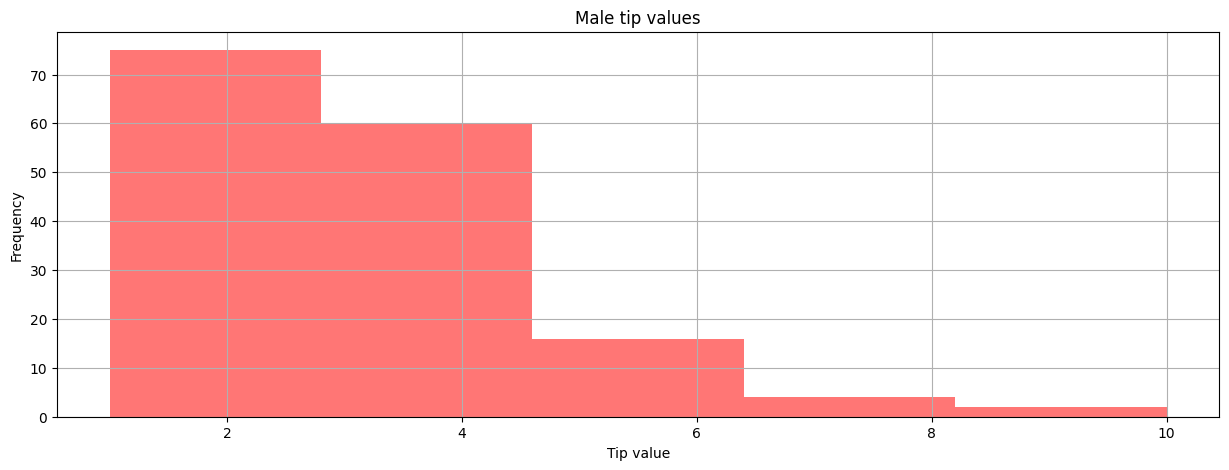

In [ ]:
# Create male histogram
plt.figure(figsize = (15, 5))

plt.hist(male_df.tip,
         bins = 5,
         color = '#ff7675')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Male tip values')

plt.grid(True)

plt.show()

##### **♀ Females tips histogram**

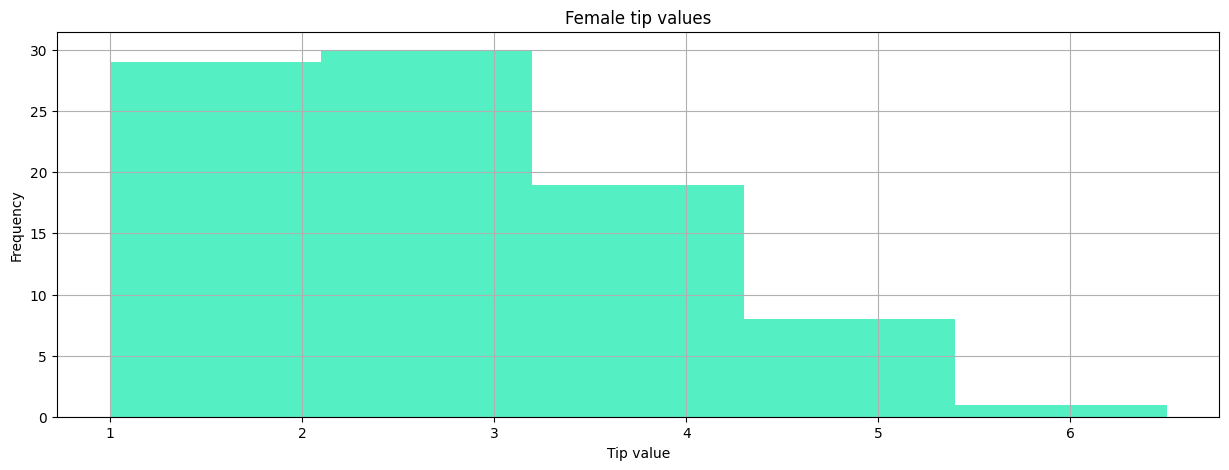

In [ ]:
# Create female histogram
plt.figure(figsize = (15, 5))

plt.hist(female_df.tip,
         bins = 5,
         color = '#55efc4')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Female tip values')

plt.grid(True)

plt.show()

Plot all 3 charts in a row in the same cell:

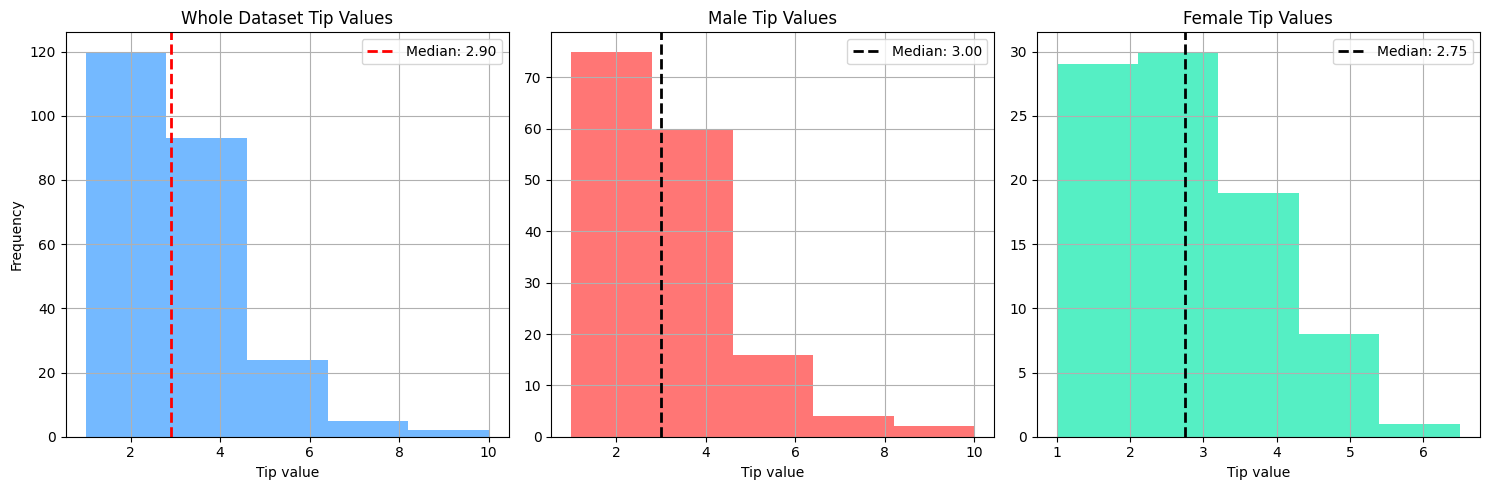

In [ ]:
# Create a figure with 3 subplots in 1 row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for whole dataset
axes[0].hist(df1.tip, bins=5, color='#74b9ff')
axes[0].set_title('Whole Dataset Tip Values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df1.tip.median(), color='red', linestyle='dashed', linewidth=2, label=f'Median: {df1.tip.median():.2f}')
axes[0].legend()
axes[0].grid(True)

# Histogram for smokers
axes[1].hist(male_df.tip, bins=5, color='#ff7675')
axes[1].set_title('Male Tip Values')
axes[1].set_xlabel('Tip value')
axes[1].axvline(male_df.tip.median(), color='black', linestyle='dashed', linewidth=2, label=f'Median: {male_df.tip.median():.2f}')
axes[1].legend()
axes[1].grid(True)

# Histogram for non-smokers
axes[2].hist(female_df.tip, bins=5, color='#55efc4')
axes[2].set_title('Female Tip Values')
axes[2].set_xlabel('Tip value')
axes[2].axvline(female_df.tip.median(), color='black', linestyle='dashed', linewidth=2, label=f'Median: {female_df.tip.median():.2f}')
axes[2].legend()
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

**Insights based on distribution comparison:**

---

1. The highest frequency of tips from both male and female audiences falls between `$1` and `$3`.
2. Male tips are observed to be more generous. Their median tip is `$3.00`, while the female median tip is `$2.75`. Additionally, male customers have the highest tip with \$10.00, compared to females with a maximum tip of `$6.50`.
3. The mean of the female group (`$2.83`) is noticeably greater than its median (`$2.75`), indicating a stronger right-skewness or tendency to lower tips within that group.

General conclusion: Male customers, on average, tend to leave slightly higher tips compared to female customers.

### **📆 Do weekends bring more tips?**

#### **Separate weekends and other days**

In [ ]:
# Create "weekends_df" dataframe
weekends_df = df1.query('day == "Sun" or day == "Sat"')

In [ ]:
weekends_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
15,15,21.58,3.92,Male,No,Sun,Dinner,2
228,228,13.28,2.72,Male,No,Sat,Dinner,2
70,70,12.02,1.97,Male,No,Sat,Dinner,2
154,154,19.77,2.0,Male,No,Sun,Dinner,4
1,1,10.34,1.66,Male,No,Sun,Dinner,3


In [ ]:
# Create "other_days_df" dataframe
other_days_df = df1.query('day != "Sun" and day != "Sat"')

In [ ]:
other_days_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
100,100,11.35,2.5,Female,Yes,Fri,Dinner,2
222,222,8.58,1.92,Male,Yes,Fri,Lunch,1
134,134,18.26,3.25,Female,No,Thur,Lunch,2
198,198,13.0,2.0,Female,Yes,Thur,Lunch,2
221,221,13.42,3.48,Female,Yes,Fri,Lunch,2


🏖 Weekends

In [ ]:
# Calculation for dinner
weekends_tip_min = weekends_df['tip'].min()
weekends_tip_max = weekends_df['tip'].max()
weekends_tip_mean = weekends_df['tip'].mean()
weekends_tip_median = weekends_df['tip'].median()

In [ ]:
# Make a list of values
weekends_values = [weekends_tip_min, weekends_tip_max, weekends_tip_mean, weekends_tip_median]
# Round all the values to 4 decimal places
weekends_values = map(lambda x: round(x, 4), weekends_values)

# Make a dataframe from the list
weekends_mct = pd.DataFrame(weekends_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekends_mct

,0
min,1.0000
max,10.0000
mean,3.1153
median,3.0000


🏢 Other days

In [ ]:
# Calculation for dinner
other_days_tip_min = other_days_df['tip'].min()
other_days_tip_max = other_days_df['tip'].max()
other_days_tip_mean = other_days_df['tip'].mean()
other_days_tip_median = other_days_df['tip'].median()

In [ ]:
# Make a list of values
other_days_values = [other_days_tip_min, other_days_tip_max, other_days_tip_mean, other_days_tip_median]
# Round all the values to 4 decimal places
other_days_values = map(lambda x: round(x, 4), other_days_values)

# Make a dataframe from the list
other_days_mct = pd.DataFrame(other_days_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
other_days_mct

,0
min,1.0000
max,6.7000
mean,2.7628
median,2.5000


##### **📝 Conclusion**

In [ ]:
all_vals_days_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Weekends': {'min': weekends_tip_min, 'max': weekends_tip_max, 'mean': weekends_tip_mean, 'median': weekends_tip_median},
    'Other_days': {'min': other_days_tip_min, 'max': other_days_tip_max, 'mean': other_days_tip_mean, 'median': other_days_tip_median}
}

# Make a dataframe
all_mct_days = pd.DataFrame(all_vals_days_dict)
# Output the dataframe
all_mct_days

,Common,Weekends,Other_days
min,1.000000,1.000000,1.00000
max,10.000000,10.000000,6.70000
mean,2.998279,3.115276,2.76284
median,2.900000,3.000000,2.50000


**Insights based on measures of central tendency comparison:**

1. Diners on weekends give the highest tip, which was \$10

2. On average (both mean and median), diners on normal days tip less than weekends customers.

General conclusion:
People dining in weekends are more generous with their tips compared to eaters on weekdays.

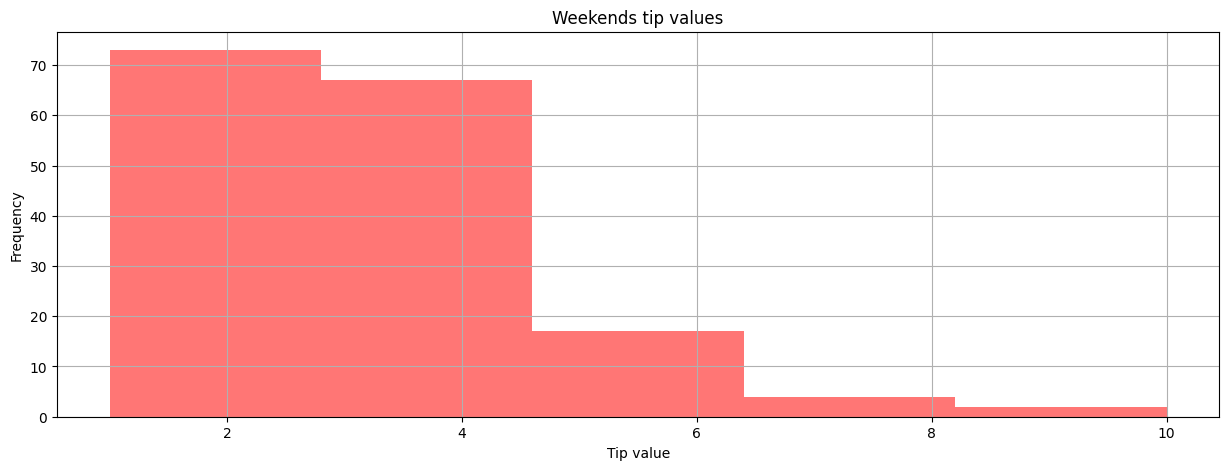

In [ ]:
# Create dinner histogram
plt.figure(figsize = (15, 5))

plt.hist(weekends_df.tip,
         bins = 5,
         color = '#ff7675')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Weekends tip values')

plt.grid(True)

plt.show()

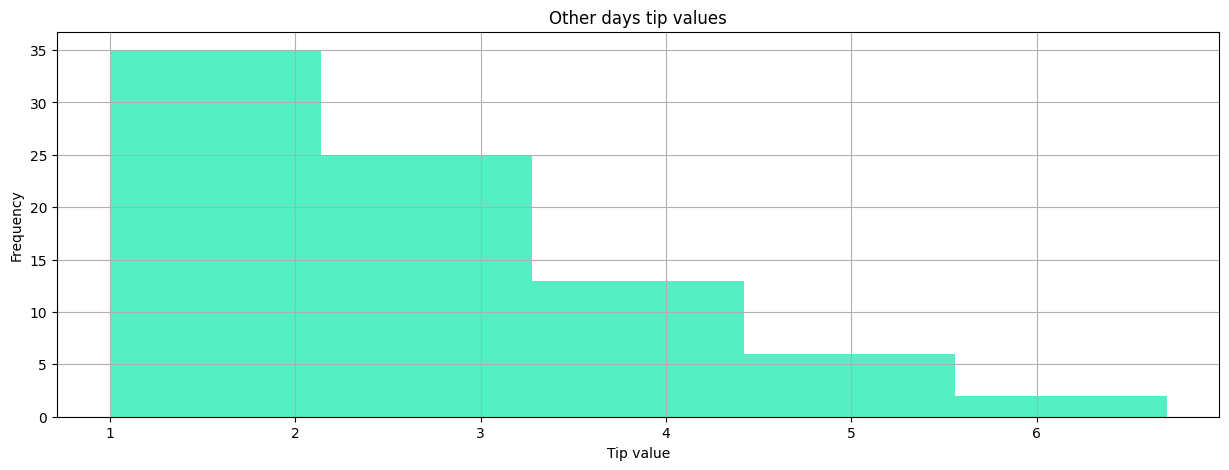

In [ ]:
# Create other times histogram
plt.figure(figsize = (15, 5))

plt.hist(other_days_df.tip,
         bins = 5,
         color = '#55efc4')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Other days tip values')

plt.grid(True)

plt.show()

Plot all 3 charts in a row in the same cell:

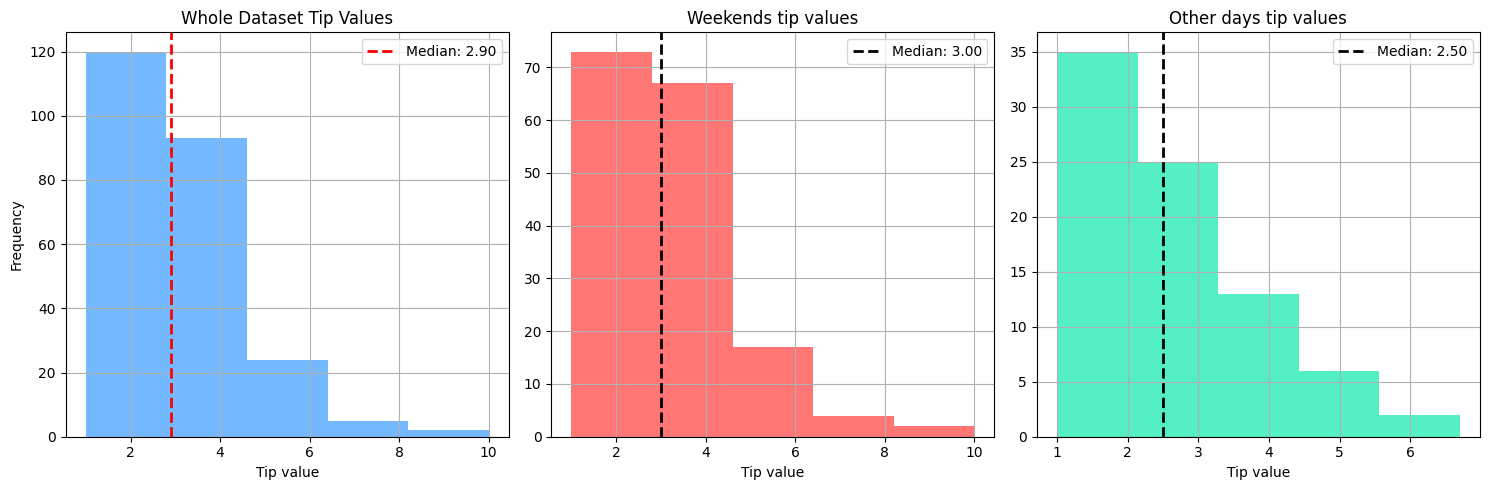

In [ ]:
# Create a figure with 3 subplots in 1 row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for whole dataset
axes[0].hist(df1.tip, bins=5, color='#74b9ff')
axes[0].set_title('Whole Dataset Tip Values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df1.tip.median(), color='red', linestyle='dashed', linewidth=2, label=f'Median: {df1.tip.median():.2f}')
axes[0].legend()
axes[0].grid(True)

# Histogram for smokers
axes[1].hist(weekends_df.tip, bins=5, color='#ff7675')
axes[1].set_title('Weekends tip values')
axes[1].set_xlabel('Tip value')
axes[1].axvline(weekends_df.tip.median(), color='black', linestyle='dashed', linewidth=2, label=f'Median: {weekends_df.tip.median():.2f}')
axes[1].legend()
axes[1].grid(True)

# Histogram for non-smokers
axes[2].hist(other_days_df.tip, bins=5, color='#55efc4')
axes[2].set_title('Other days tip values')
axes[2].set_xlabel('Tip value')
axes[2].axvline(other_days_df.tip.median(), color='black', linestyle='dashed', linewidth=2, label=f'Median: {other_days_df.tip.median():.2f}')
axes[2].legend()
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

**Insights based on distribution comparison:**

---

1. The highest frequency of tips from both weekend and other days audiences falls between `$1` and `$3`.
2. Weekend tips are observed to be more generous. Their median tip is `$3.00`, while the other days median tip is `$2.50`. Additionally, weekend customers have the highest tip with `$10.00`, compared to other days customers with a maximum tip of `$6.70`.
3. The mean of the "Other days" group (`$2.76`) is noticeably greater than its median (`$2.50`), indicating a stronger right-skewness or tendency to lower tips within that group.

General conclusion: Customers on weekends, on average, tend to leave slightly higher tips compared to customers on other days.

### **🕑 Do dinners bring more tips?**

#### **Separate dinners and other times**

In [ ]:
# Create "dinner_df" dataframe
dinner_df = df1.query('time == "Dinner"')

In [ ]:
dinner_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
218,218,7.74,1.44,Male,Yes,Sat,Dinner,2
95,95,40.17,4.73,Male,Yes,Fri,Dinner,4
156,156,48.17,5.0,Male,No,Sun,Dinner,6
158,158,13.39,2.61,Female,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Create "other_times_df" dataframe
other_times_df = df1.query('time != "Dinner"')

In [ ]:
other_times_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
123,123,15.95,2.0,Male,No,Thur,Lunch,2
140,140,17.47,3.5,Female,No,Thur,Lunch,2
148,148,9.78,1.73,Male,No,Thur,Lunch,2
204,204,20.53,4.0,Male,Yes,Thur,Lunch,4
119,119,24.08,2.92,Female,No,Thur,Lunch,4


##### **🌛 dinners**

In [ ]:
# Calculation for dinner
dinner_tip_min = dinner_df['tip'].min()
dinner_tip_max = dinner_df['tip'].max()
dinner_tip_mean = dinner_df['tip'].mean()
dinner_tip_median = dinner_df['tip'].median()

In [ ]:
# Make a list of values
dinner_values = [dinner_tip_min, dinner_tip_max, dinner_tip_mean, dinner_tip_median]
# Round all the values to 4 decimal places
dinner_values = map(lambda x: round(x, 4), dinner_values)

# Make a dataframe from the list
dinner_mct = pd.DataFrame(dinner_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
dinner_mct

,0
min,1.0000
max,10.0000
mean,3.1027
median,3.0000


##### **⛅ other times in day**

In [ ]:
# Calculation for dinner
other_times_tip_min = other_times_df['tip'].min()
other_times_tip_max = other_times_df['tip'].max()
other_times_tip_mean = other_times_df['tip'].mean()
other_times_tip_median = other_times_df['tip'].median()

In [ ]:
# Make a list of values
other_times_values = [other_times_tip_min, other_times_tip_max, other_times_tip_mean, other_times_tip_median]
# Round all the values to 4 decimal places
other_times_values = map(lambda x: round(x, 4), other_times_values)

# Make a dataframe from the list
dinner_mct = pd.DataFrame(other_times_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
dinner_mct

,0
min,1.2500
max,6.7000
mean,2.7281
median,2.2500


##### **📝 Conclusion**

In [ ]:
all_vals_times_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Dinner': {'min': dinner_tip_min, 'max': dinner_tip_max, 'mean': dinner_tip_mean, 'median': dinner_tip_median},
    'Other_times': {'min': other_times_tip_min, 'max': other_times_tip_max, 'mean': other_times_tip_mean, 'median': other_times_tip_median}
}

# Make a dataframe
all_mct_times = pd.DataFrame(all_vals_times_dict)
# Output the dataframe
all_mct_times

,Common,Dinner,Other_times
min,1.000000,1.00000,1.250000
max,10.000000,10.00000,6.700000
mean,2.998279,3.10267,2.728088
median,2.900000,3.00000,2.250000


**Insights based on measures of central tendency comparison:**

1. Dinner customers left the most generous tips, with the highest single tip being \$10.
2. On average (both mean and median), customers dining at other times of day tip less than the dinner crowd.

General conclusion:
Dinner patrons tend to be more generous with their tips compared to lunch and other meal customers.

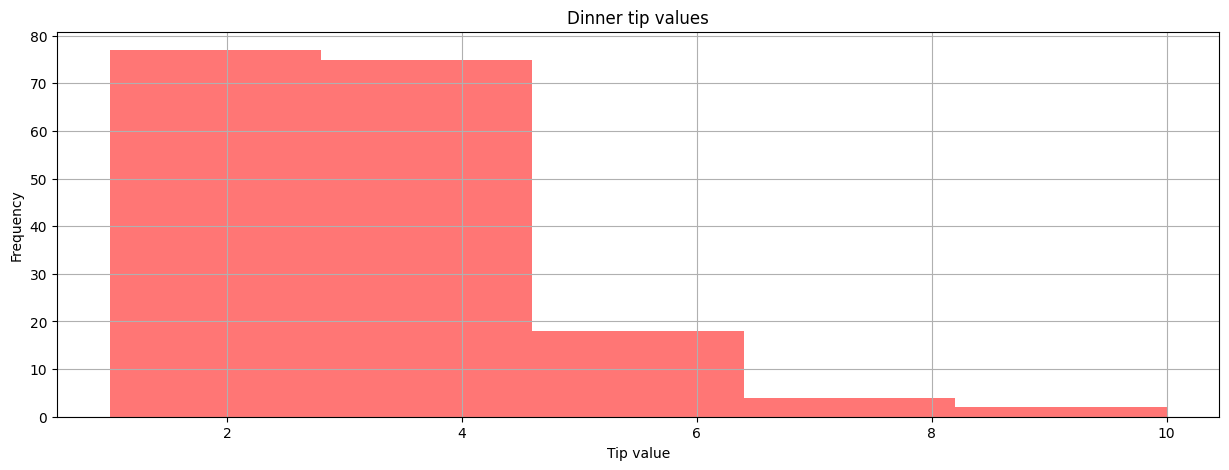

In [ ]:
# Create dinner histogram
plt.figure(figsize = (15, 5))

plt.hist(dinner_df.tip,
         bins = 5,
         color = '#ff7675')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Dinner tip values')

plt.grid(True)

plt.show()

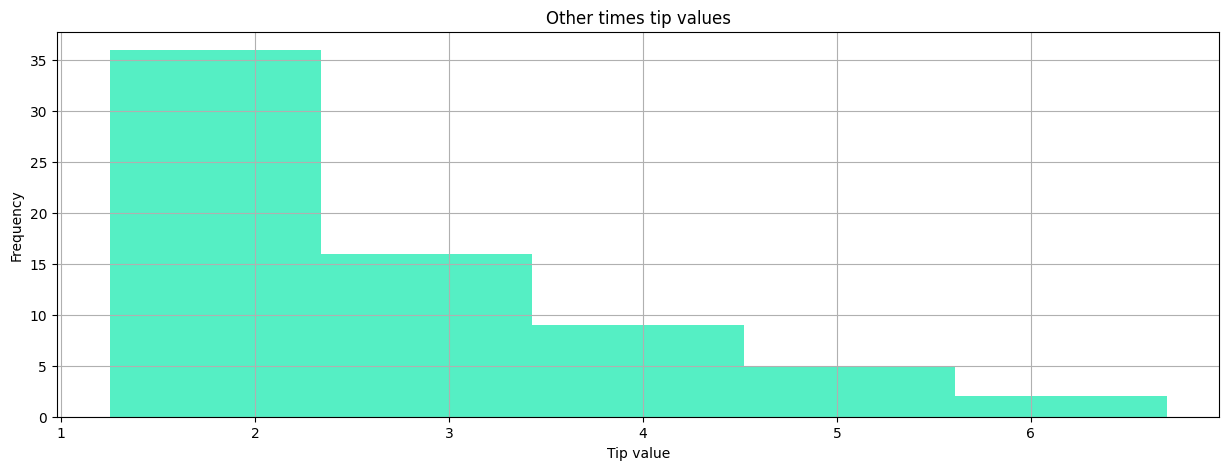

In [ ]:
# Create other times histogram
plt.figure(figsize = (15, 5))

plt.hist(other_times_df.tip,
         bins = 5,
         color = '#55efc4')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Other times tip values')

plt.grid(True)

plt.show()

Plot all 3 charts in a row in the same cell:

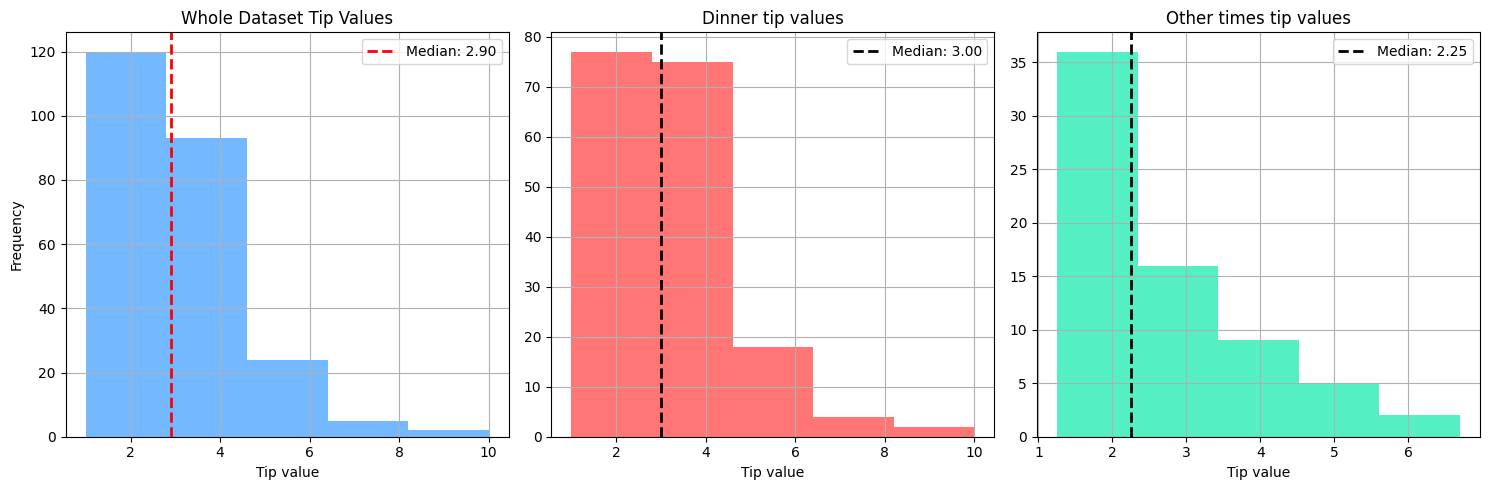

In [ ]:
# Create a figure with 3 subplots in 1 row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for whole dataset
axes[0].hist(df1.tip, bins=5, color='#74b9ff')
axes[0].set_title('Whole Dataset Tip Values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df1.tip.median(), color='red', linestyle='dashed', linewidth=2, label=f'Median: {df1.tip.median():.2f}')
axes[0].legend()
axes[0].grid(True)

# Histogram for smokers
axes[1].hist(dinner_df.tip, bins=5, color='#ff7675')
axes[1].set_title('Dinner tip values')
axes[1].set_xlabel('Tip value')
axes[1].axvline(dinner_df.tip.median(), color='black', linestyle='dashed', linewidth=2, label=f'Median: {dinner_df.tip.median():.2f}')
axes[1].legend()
axes[1].grid(True)

# Histogram for non-smokers
axes[2].hist(other_times_df.tip, bins=5, color='#55efc4')
axes[2].set_title('Other times tip values')
axes[2].set_xlabel('Tip value')
axes[2].axvline(other_times_df.tip.median(), color='black', linestyle='dashed', linewidth=2, label=f'Median: {other_times_df.tip.median():.2f}')
axes[2].legend()
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

**Insights based on distribution comparison:**

---

1. The highest frequency of tips from both dinner and other times audiences falls between `$1` and `$3`.
2. Dinner tips are observed to be more generous. Their median tip is \$3.00, while the "Other_times" median tip is `$2.25`. Additionally, dinner customers have the highest tip with \$10.00, compared to "Other_times" customers with a maximum tip of `$6.70`.
3. The mean of the "Other_times" group (`$2.73`) is noticeably greater than its median (`$2.25`), indicating a stronger right-skewness or tendency to lower tips within that group.

General conclusion: Customers during dinner time, on average, tend to leave significantly higher tips compared to customers during other times.